# Importing Libraries & Data

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [73]:
cities = pd.read_csv('cities.csv',
                     header = None,
                     index_col = 0,
                     names=['x','y'])

In [74]:
cities.head()

,x,y
1,37,52
2,49,49
3,52,64
4,20,26
5,40,30


## Plotting the Cities

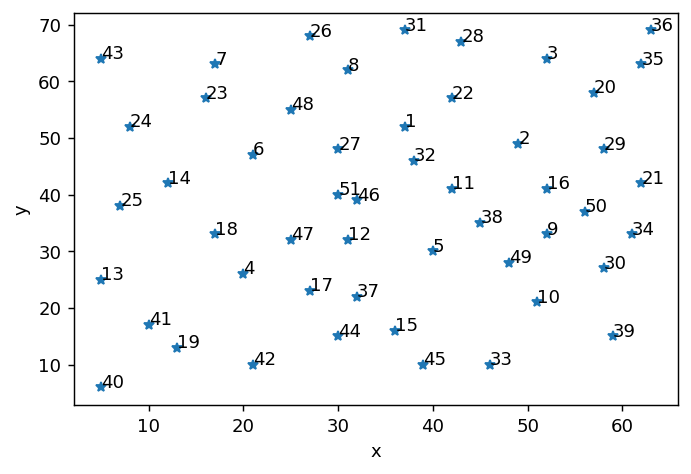

In [75]:
plt.figure(dpi = 130)
plt.plot(cities.loc[:,'x'], cities.loc[:,'y'], "*")
plt.xlabel('x')
plt.ylabel('y')

for i in cities.index:
    plt.annotate(i, (cities.loc[i,'x'], cities.loc[i,'y']))

# Creating Random Solution

In [76]:
def generate_random_solution(df_of_cities):
    np.random.seed(10)
    n_of_cities = len(df_of_cities)
    rand_seq = np.random.permutation(np.arange(1,n_of_cities+1))
    rand_seq = np.append(rand_seq, rand_seq[0])
    return rand_seq

In [77]:
rand_seq = generate_random_solution(cities)

In [78]:
rand_seq

array([28, 39, 46, 24, 33, 21,  4, 32, 22, 49,  8,  7, 41,  3, 42, 35, 11,
       38, 36, 19,  5,  2, 13, 44, 27, 31, 47,  6, 14, 23, 20, 18, 15, 43,
       34, 25, 12, 40, 17, 50, 48, 51,  9, 45, 30, 26, 29,  1, 16, 37, 10,
       28])

In [79]:
cities.loc[rand_seq].head()

,x,y
28,43,67
39,59,15
46,32,39
24,8,52
33,46,10


# Calculating Distance

In [80]:
def d(city1, city2):
    squared = (city1-city2)**2
    return np.sqrt(np.sum(squared))

In [81]:
city1 = cities.loc[1]
city2 = cities.loc[2]
d(city1, city2)

12.36931687685298

# Calculating Total Distance

In [82]:
def calculate_total_distance(df_of_cities, sequence):
    original = df_of_cities.loc[sequence]
    shifted = original.iloc[1:].append(original.iloc[0])
    squared = (original.values - shifted.values)**2
    return np.sum(np.sqrt(np.sum(squared, axis=1)))

In [83]:
calculate_total_distance(cities, rand_seq)

1788.4358996928684

# Implement 2-Opt Improvement

In [84]:
def two_opt(df_of_cities, prev_sol):
    new_sol = prev_sol.copy()
    N = len(new_sol)
    
    for i in range(0,N-3):
        for j in range(i+2, N-1):
            ordered_cities = df_of_cities.loc[new_sol]
            
            city_i = ordered_cities.iloc[i]
            city_ip = ordered_cities.iloc[i+1]
            city_j = ordered_cities.iloc[j]
            city_jp = ordered_cities.iloc[j+1]
            
            lhs = d(city_i, city_ip) + d(city_j, city_jp)
            rhs = d(city_i, city_j) + d(city_ip, city_jp)
            
            if lhs > rhs:
                new_sol[i+1:j+1] = new_sol[i+1:j+1][::-1]
    return new_sol

# Evaluate Solutions

## Create Random & 2-Opt Solutions

In [85]:
prev_sol = generate_random_solution(cities)

In [86]:
start_time = time.time()
old_x = prev_sol
old_f = 10000
for i in range(30): #Change range parameter for the number of iterations
    new_x = two_opt(cities, old_x)
    new_f = calculate_total_distance(cities, new_x)
    if new_f < old_f:
        old_x = new_x
        old_f = new_f
end_time = time.time() - start_time
print(f"Execution Time: {end_time} seonds")

Execution Time: 61.25575375556946 seonds


## Random Solution

### Plot of the Route

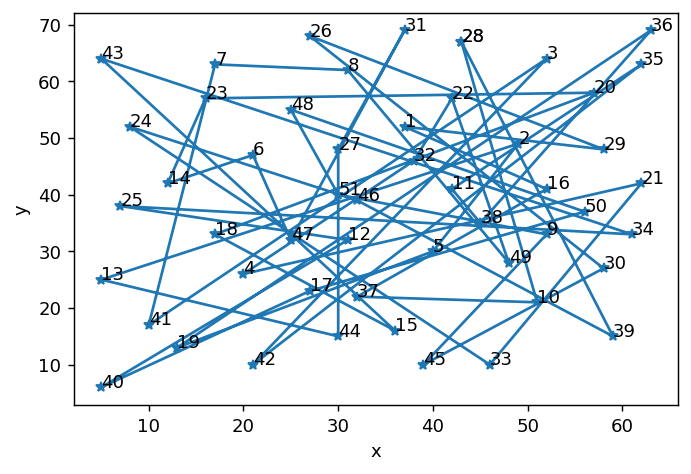

In [87]:
prev_cities = cities.loc[prev_sol]

plt.figure(dpi = 130)
plt.plot(prev_cities.loc[:,'x'], prev_cities.loc[:,'y'], "-*")
plt.xlabel('x')
plt.ylabel('y')

for i in prev_sol:
    plt.annotate(i, (prev_cities.drop_duplicates().loc[i,'x'], prev_cities.drop_duplicates().loc[i,'y']))

### Total Distance

In [88]:
calculate_total_distance(cities, prev_sol)

1788.4358996928684

## 2-Opt Solution

### Plot of the Route

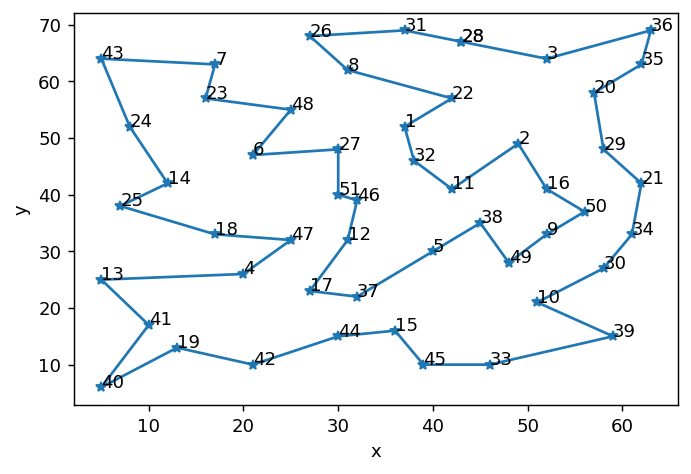

In [89]:
new_cities = cities.loc[old_x]

plt.figure(dpi = 130)
plt.plot(new_cities.loc[:,'x'], new_cities.loc[:,'y'], "-*")
plt.xlabel('x')
plt.ylabel('y')

for i in old_x:
    plt.annotate(i, (new_cities.drop_duplicates().loc[i,'x'], new_cities.drop_duplicates().loc[i,'y']))

### Total Distance

In [90]:
calculate_total_distance(cities, old_x)

439.01853443558076

In [91]:
old_x

array([28,  3, 36, 35, 20, 29, 21, 34, 30, 10, 39, 33, 45, 15, 44, 42, 19,
       40, 41, 13,  4, 47, 18, 25, 14, 24, 43,  7, 23, 48,  6, 27, 51, 46,
       12, 17, 37,  5, 38, 49,  9, 50, 16,  2, 11, 32,  1, 22,  8, 26, 31,
       28])